In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
data=pd.read_csv('Placement_Data_Full_Class.csv')
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [36]:
data.drop(['ssc_b','hsc_b','hsc_s','degree_t','salary'],axis=1,inplace=True)

In [37]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
hsc_p             0
degree_p          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

# PREPROCESSING

In [38]:
#encoding
data['gender']=data.gender.map({'M':0,'F':1})
data['workex']=data.workex.map({'No':0,'Yes':1})
data['status']=data.status.map({"Not Placed":0,"Placed":1})
data['specialisation']=data.specialisation.map({'Mkt&HR':0,"Mkt&Fin":1})

In [39]:
data

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,82.00,77.60,0,91.0,1,74.49,1
211,212,0,58.00,60.00,72.00,0,74.0,1,53.62,1
212,213,0,67.00,67.00,73.00,1,59.0,1,69.72,1
213,214,1,74.00,66.00,58.00,0,70.0,0,60.23,1


# BALANCE DATASET

In [40]:
data['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

In [41]:
from sklearn.utils import resample

data_majority=data[data['status']==1]
data_minority=data[data['status']==0]

data_minority_unsampled=resample(data_minority,replace=True,n_samples=len(data_majority),random_state=42)

balanced_data=pd.concat([data_majority,data_minority_unsampled])

In [42]:
balanced_data['status'].value_counts()

1    148
0    148
Name: status, dtype: int64

# TRAIN TEST SPLIT

In [43]:
x=balanced_data.copy().drop('status',axis=1)
y=balanced_data['status']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# FEATURE SCALING

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)



KNeighborsClassifier(n_neighbors=3)

In [47]:
knn_y_pred=knn.predict(x_test)
knn_y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [48]:
accuracy_score=accuracy_score(knn_y_pred,y_test)
accuracy_score

0.7640449438202247

In [49]:
cm=confusion_matrix(y_test,knn_y_pred)
cm

array([[43,  7],
       [14, 25]], dtype=int64)

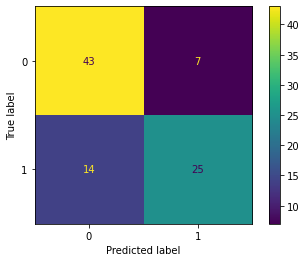

In [50]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

# DECISION TREE

In [57]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_y_pred = decision_tree.predict(x_test)


decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
decision_tree_accuracy

0.8314606741573034

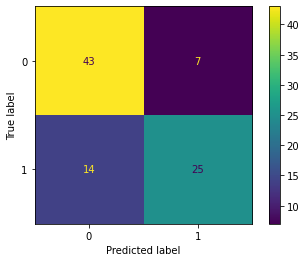

In [58]:
cm=confusion_matrix(y_test,knn_y_pred)
cm
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

# SVM

In [59]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svm_y_pred=svc.predict(x_test)
svc_accuracy=accuracy_score(y_test,svm_y_pred)
svc_accuracy

0.8651685393258427

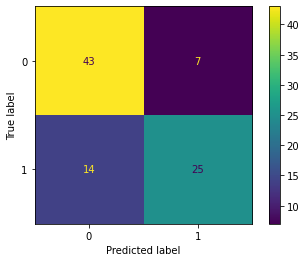

In [60]:
cm=confusion_matrix(y_test,knn_y_pred)
cm
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

# RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train,y_train)
random_forest_y_pred=random_forest.predict(x_test)
random_forest_accuracy=accuracy_score(y_test,random_forest_y_pred)
random_forest_accuracy

0.898876404494382

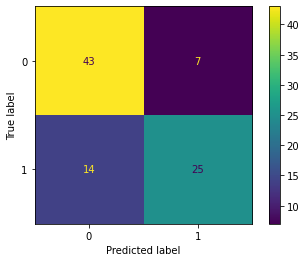

In [63]:
cm=confusion_matrix(y_test,knn_y_pred)
cm
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

# SINGLE VALUE PREDICTION

In [69]:
print("predicted class:",random_forest.predict(x_train[70].reshape(1,-1))[0])
print("Actual class:",y_test.iloc[70])

predicted class: 1
Actual class: 1


# PREDICTIVE SYSTEM

In [70]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    data = {
    'sl_no': [sl_no],
    'gender': [gender],
    'ssc_p': [ssc_p],
    'hsc_p': [hsc_p],
    'degree_p': [degree_p],
    'workex': [workex],
    'etest_p': [etest_p],
    'specialisation': [specialisation],
    'mba_p': [mba_p]
    }
    data = pd.DataFrame(data)
    data['gender'] = data['gender'].map({'M':1,"F":0})
    data['workex'] = data['workex'].map({"Yes":1,"No":0})
    data['specialisation'] = data['specialisation'].map({"Mkt&HR":1,"Mkt&Fin":0})
    
    scaled_df = scaler.fit_transform(data)
    result = random_forest.predict(scaled_df).reshape(1, -1)
    return result[0]

In [72]:
sl_no =11
gender = "F"
ssc_p =58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)

if result == 1:
    print('place')

else:
    print('not placed')


not placed


# SAVING FILES

In [73]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))